In [1]:
import scipy
import os
import numpy as np
import matplotlib.pyplot as plt
seq_dim=(6,6)

0.00012817979


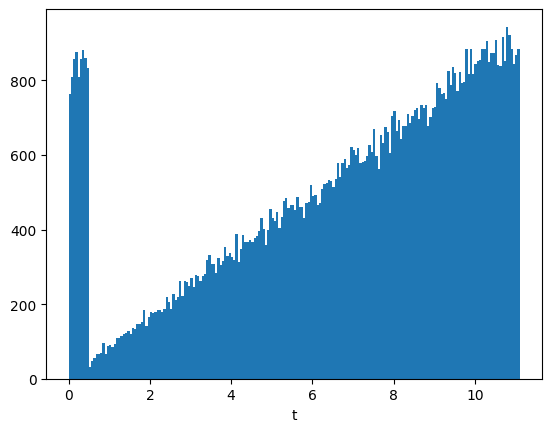

In [2]:
testdir = "./"
t = np.load(os.path.join(testdir, "t.npy"))
plt.hist(t,bins=200)
plt.xlabel(r"t")
print(t.min())

In [3]:

seq = np.load(os.path.join(testdir, "seq.npy"))
seq_t = np.load(os.path.join(testdir, "seq_t.npy"))
seq_t_prev = np.load(os.path.join(testdir, "seq_t_prev.npy"))

xt = np.load(os.path.join(testdir, "xt.npy"))
ut_read = np.load(os.path.join(testdir, "ut.npy"))
print(xt.shape, t.shape, ut_read.shape, seq.shape)

(100000, 6, 6, 2) (100000,) (100000, 6, 6, 2) (100000, 6, 6)


In [4]:
import torch
def sample_cond_vector_field_2d(seq, seq_t, seq_prev_onehot, seq_t_prev, channels):
    shape = seq.shape
    batchsize = seq.shape[0]
    seq_onehot = torch.nn.functional.one_hot(seq.reshape(-1), num_classes=channels).reshape(*shape, channels)

    t = seq_t_prev
    sigma_t = torch.rand(batchsize).to(seq.device).float()
    sigma_t = sigma_t*(seq_t-seq_t_prev)
    print((sigma_t==0).any())
    sample_x = seq_prev_onehot*sigma_t[:,None,None,None] + t[:,None,None,None]*seq_onehot
    print(torch.isnan(sample_x).any())
    print(torch.isnan(seq_onehot).any())
    ut = (seq_onehot-sample_x)/sigma_t[:,None,None,None]
    print(torch.isnan(ut).any())
    sample_x.requires_grad = False
    return sample_x, t, ut.float()

In [5]:
# xx, t, ut = sample_cond_vector_field_2d(torch.from_numpy(seq), torch.from_numpy(seq_t), torch.from_numpy(seq_prev), torch.from_numpy(seq_t_prev), 2)
print(np.isnan(ut_read).any())

False


In [7]:
loss = np.load(os.path.join(testdir, "losses.npy"))
ut = np.load(os.path.join(testdir, "ut.npy"))

In [8]:
print(loss.min(), loss.max(), loss.mean(), loss.shape, ut.shape, np.isinf(ut).any(), np.isinf(loss).any())
ut=ut.mean(-1).reshape(-1,np.prod(seq_dim))

0.03743172 3306233600.0 1860797.8 (100000, 36) (100000, 6, 6, 2) False False


(100000, 36)


/tmp/ipykernel_1954706/1279520798.py:2: RuntimeWarning: divide by zero encountered in divide
  plt.scatter(t, (loss/(ut**2)).mean(axis=-1), s=3)


Text(0, 0.5, '$(u_t^{\\prime}-u_t)^2/(2u_t^2)$')

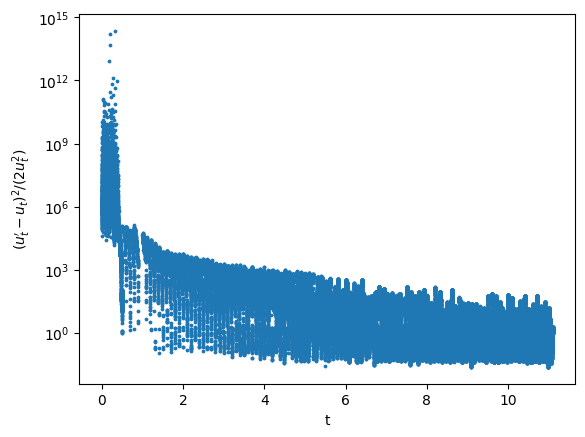

In [15]:

print(ut.shape)
plt.scatter(t, (loss/(ut**2)).mean(axis=-1), s=3)
plt.semilogy()
plt.xlabel("t")
plt.ylabel(r"$(u_t^{\prime}-u_t)^2/(2u_t^2)$")

Text(0, 0.5, '$u_t$')

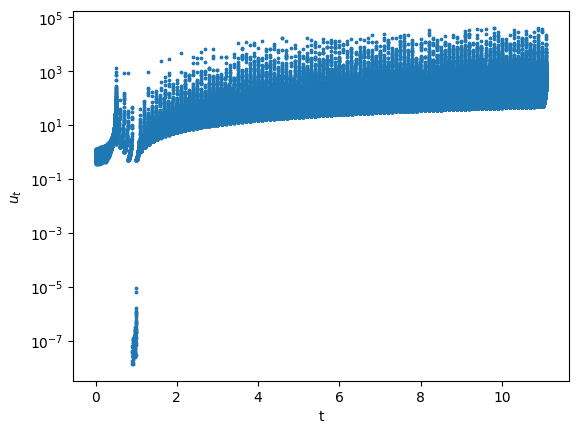

In [14]:
plt.scatter(t,np.abs(ut).mean(axis=-1), s=3)
plt.semilogy()
plt.xlabel("t")
plt.ylabel("$u_t$")

/tmp/ipykernel_1954706/3178966264.py:1: RuntimeWarning: divide by zero encountered in divide
  plt.scatter(np.abs(ut).mean(axis=-1), (loss/(ut**2)).mean(axis=-1))


Text(0, 0.5, '$(u_t^{\\prime}-u_t)^2/(2u_t^2)$')

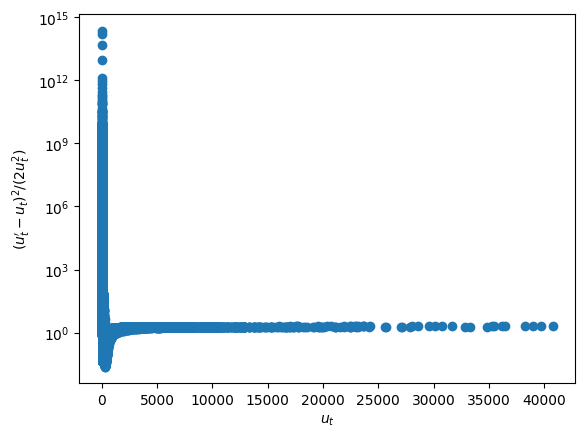

In [12]:
plt.scatter(np.abs(ut).mean(axis=-1), (loss/(ut**2)).mean(axis=-1))
plt.semilogy()
plt.xlabel("$u_t$")
plt.ylabel(r"$(u_t^{\prime}-u_t)^2/(2u_t^2)$")

In [ ]:
a=np.arange(1/20, 1/0.89, 0.01)
print(a.shape)
print(np.round(1/a, 1))

(108,)
[20.  16.7 14.3 12.5 11.1 10.   9.1  8.3  7.7  7.1  6.7  6.2  5.9  5.6
  5.3  5.   4.8  4.5  4.3  4.2  4.   3.8  3.7  3.6  3.4  3.3  3.2  3.1
  3.   2.9  2.9  2.8  2.7  2.6  2.6  2.5  2.4  2.4  2.3  2.3  2.2  2.2
  2.1  2.1  2.   2.   2.   1.9  1.9  1.9  1.8  1.8  1.8  1.7  1.7  1.7
  1.6  1.6  1.6  1.6  1.5  1.5  1.5  1.5  1.4  1.4  1.4  1.4  1.4  1.4
  1.3  1.3  1.3  1.3  1.3  1.2  1.2  1.2  1.2  1.2  1.2  1.2  1.1  1.1
  1.1  1.1  1.1  1.1  1.1  1.1  1.1  1.   1.   1.   1.   1.   1.   1.
  1.   1.   1.   0.9  0.9  0.9  0.9  0.9  0.9  0.9]


[]

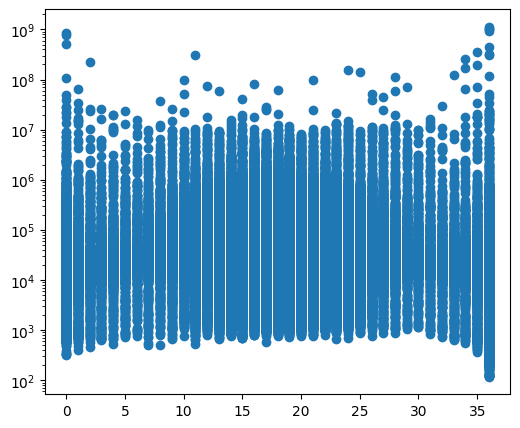

In [ ]:
plt.scatter(seq.reshape(-1, np.prod(seq_dim)).sum(axis=-1), loss.mean(axis=-1))
plt.semilogy()

In [ ]:
st = np.argmax(xt, axis=-1)


In [ ]:
print(t.min(), t.max(), t[0])
condition_plot = (t > 0.049) & (t < 0.051)
idx_plot = np.where(condition_plot)
print(idx_plot[0].shape, t.shape)

1e-04 1.0869565 1e-04
(400,) (61316,)


([], [])

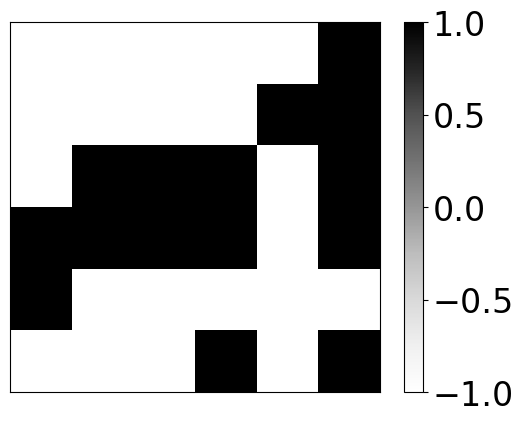

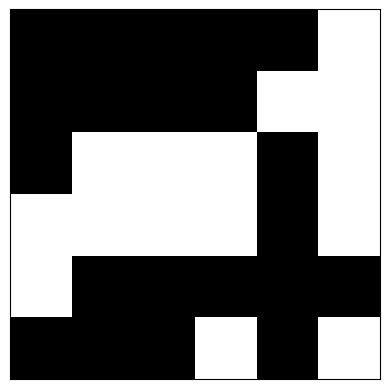

In [ ]:
plt.figure()
plt.imshow((xt[idx_plot[0][0],:,:,0]-xt[idx_plot[0][0],:,:,1])/(xt[idx_plot[0][0],:,:,0]+xt[idx_plot[0][0],:,:,1]), cmap='Greys', vmin=-1, vmax=1)
plt.xticks([])
plt.yticks([])
cbar = plt.colorbar()
cbar.ax.tick_params(axis='both', which='major', labelsize=24)
plt.figure()
plt.imshow(st[idx_plot[0][0],:,:], cmap='Greys', vmin=0, vmax=1)
plt.xticks([])
plt.yticks([])

In [ ]:
st[np.where(st == 0)] = -1
magn_s = st.reshape(-1,np.prod(seq_dim)).sum(-1)
magn_x = ((xt.reshape(-1,np.prod(seq_dim),2))*np.array([-1,1])[np.newaxis, np.newaxis, :]).sum(-1)
magn_x = magn_x.sum(-1)


In [ ]:
print(t.min(), t.max(), t[0])
condition_plot = (t > 0.7) & (t < 0.9)
idx_plot = np.where(condition_plot)
print(idx_plot[0].shape, t.shape)

1e-04 1.0869565 1e-04
(5130,) (61316,)


(-36.0, 36.0)

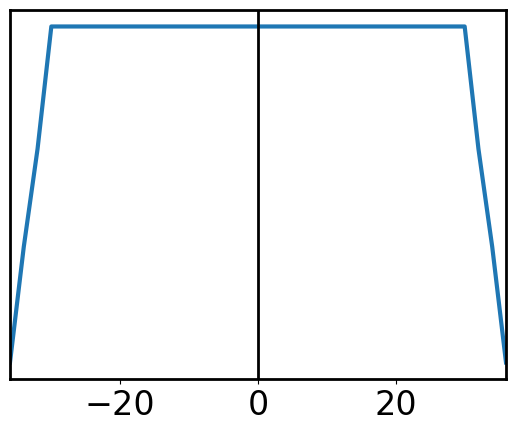

In [ ]:
magn_bins = np.arange(-np.prod(seq_dim), np.prod(seq_dim)+1, 2)
bins = np.linspace(magn_bins[0]-1, magn_bins[-1]+1, np.prod(seq_dim)+1+1)
hist, bin_edges = np.histogram(magn_s[idx_plot], bins=bins)
bin_centers = np.array([(bin_edges[i]+bin_edges[i+1])/2. for i in range(len(bin_edges)-1)])
P = hist/np.sum(hist)
idxF = np.where(hist>0)
F=-np.log(P[idxF])
plt.plot(magn_bins[idxF], F, linewidth=3)
plt.axvline(0, linewidth=2, c="k")
plt.tick_params(axis='x', which='major', labelsize=24)

ax = plt.gca()
# 去掉上边框
ax.spines['top'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.tick_params(left=False, labelleft=False)
plt.xlim((-np.prod(seq_dim), np.prod(seq_dim)))

Text(0, 0.5, '$\\alpha$-1')

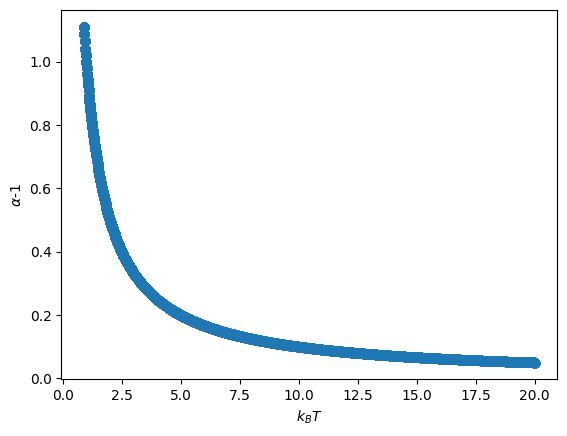

In [ ]:
plt.scatter(1./seq_t,seq_t)
# plt.axvline(3)
plt.xlabel("$k_BT$")
plt.ylabel(r"$\alpha$-1")

/tmp/ipykernel_828366/1862975320.py:2: RuntimeWarning: divide by zero encountered in divide
  plt.hist(1./(t-1),bins=200, alpha=0.5, range=(0,2))


Text(0.5, 0, '$k_BT$')

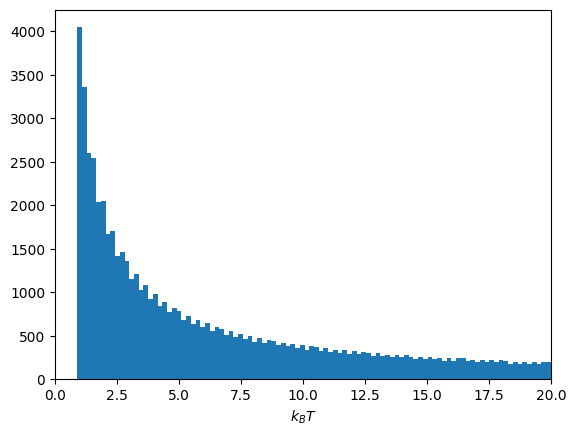

In [ ]:
plt.hist(1./seq_t,bins=100)
plt.hist(1./(t-1),bins=200, alpha=0.5, range=(0,2))
plt.xlim((0, 20))
# plt.axvline(3, c="k")
plt.xlabel("$k_BT$")


Text(0.5, 0, 't')

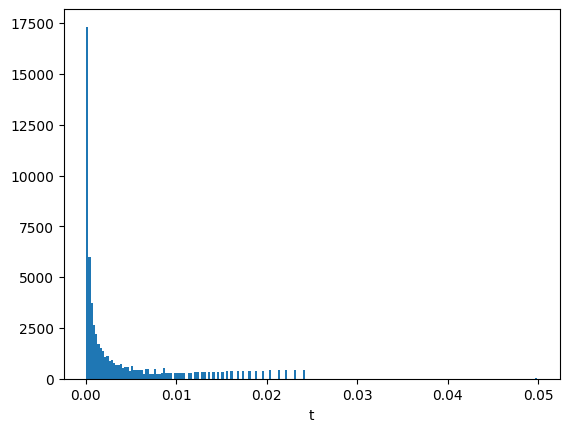

In [ ]:
plt.hist(seq_t-seq_t_prev,bins=200)
plt.xlabel(r"t")

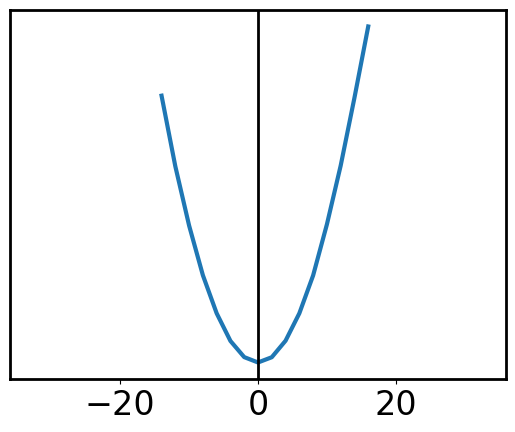

In [ ]:
'''
st[np.where(st == 0)] = -1
magn_s = st.reshape(-1,np.prod(seq_dim)).sum(-1)
magn_x = ((xt.reshape(-1,np.prod(seq_dim),2))*np.array([-1,1])[np.newaxis, np.newaxis, :]).sum(-1)
magn_x = magn_x.sum(-1)
'''
def plot_magn(magn_xx0):
    magn_bins = np.arange(-np.prod(seq_dim), np.prod(seq_dim)+1, 2)
    bins = np.linspace(magn_bins[0]-1, magn_bins[-1]+1, np.prod(seq_dim)+1+1)
    hist, bin_edges = np.histogram(magn_xx0, bins=bins)
    bin_centers = np.array([(bin_edges[i]+bin_edges[i+1])/2. for i in range(len(bin_edges)-1)])
    P = hist/np.sum(hist)
    idxF = np.where(hist>0)
    F=-np.log(P[idxF])
    plt.plot(magn_bins[idxF], F, linewidth=3)
    plt.axvline(0, linewidth=2, c="k")
    plt.tick_params(axis='x', which='major', labelsize=24)
    
    ax = plt.gca()
    # 去掉上边框
    ax.spines['top'].set_linewidth(2)
    ax.spines['left'].set_linewidth(2)
    ax.spines['right'].set_linewidth(2)
    ax.spines['bottom'].set_linewidth(2)
    ax.tick_params(left=False, labelleft=False)
    plt.xlim((-np.prod(seq_dim), np.prod(seq_dim)))
xx0 = np.load("xx0.npy")
print(xx0.shape)
magn_xx0 = ((xx0*np.array([-1,1])[np.newaxis, np.newaxis, :]).sum(-1)).sum(-1)
plot_magn(magn_xx0)

In [ ]:
u0 = np.load("u0.npy")
dt=0.5263
print(u0.shape)

(61316, 6, 6, 2)


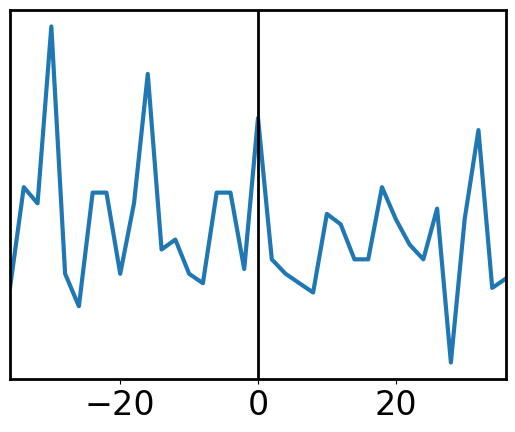

In [ ]:
magn_u0 = ((u0*dt*np.array([-1,1])[np.newaxis, np.newaxis, :]).sum(-1)).sum(-1)
plot_magn(magn_u0)

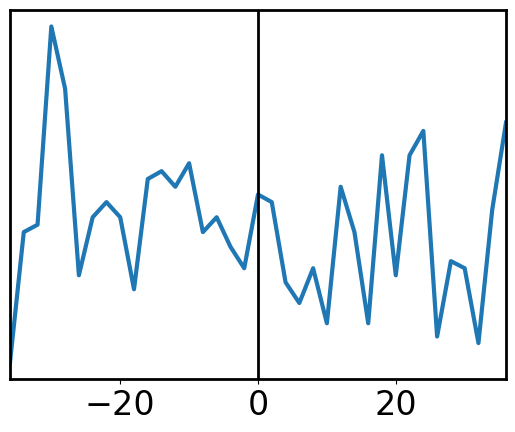

In [ ]:
xx1 = np.load("xx1.npy")
magn_xx1 = ((xx1*np.array([-1,1])[np.newaxis, np.newaxis, :]).sum(-1)).sum(-1)
plot_magn(magn_xx1)

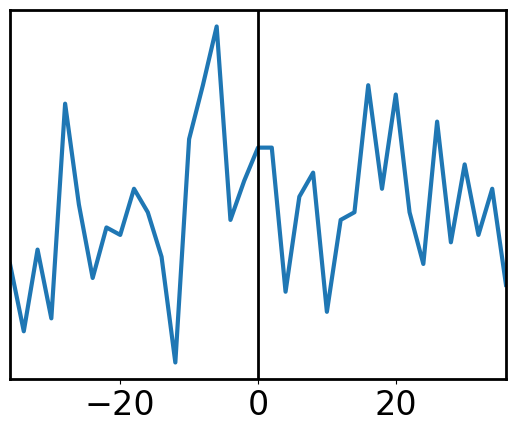

In [ ]:
u1 = np.load("u1.npy")
magn_u1 = ((u1*np.array([-1,1])[np.newaxis, np.newaxis, :]).sum(-1)).sum(-1)
plot_magn(magn_u1)

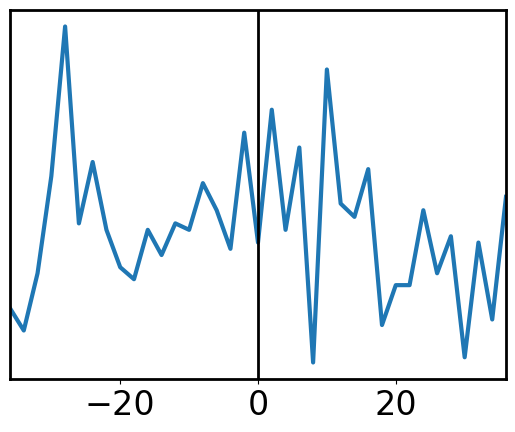

In [ ]:
xx2 = np.load("xx2.npy")
magn_xx2 = ((xx2*np.array([-1,1])[np.newaxis, np.newaxis, :]).sum(-1)).sum(-1)
plot_magn(magn_xx2)

In [ ]:
raise RuntimeError

In [ ]:

rc_logits = np.load("rc_logits.npy")
rc_seq = np.load("rc_seq.npy")
rc_loss = np.load("rc_loss.npy").reshape(20,-1).mean(axis=-1)

In [ ]:
print(rc_logits.shape, rc_loss.shape)

(20, 37) (20,)


/tmp/ipykernel_1812123/3287005045.py:8: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(xgrid, -np.log(rc_seq[i]), c=line_color[i], marker="x")


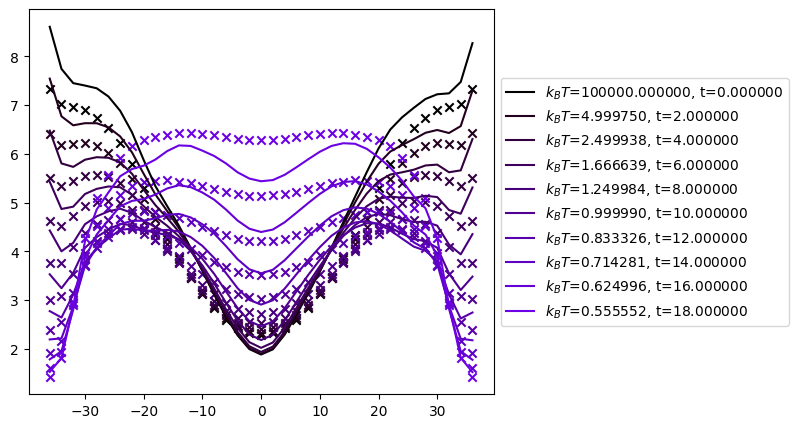

In [ ]:
line_color = [plt.colormaps["gnuplot"](float(i)/float(101)) for i in range(101)]
xgrid = np.linspace(-36, 36, 36+1)
plt.rcParams["figure.figsize"] = (6,5)
plt.figure()
for i in range(0, 20, 2):
    ii = i
    plt.plot(xgrid, -np.log(rc_logits[i]), c=line_color[i], label="$k_BT$=%f, t=%f"%(10./(ii+1e-4), ii))
    plt.scatter(xgrid, -np.log(rc_seq[i]), c=line_color[i], marker="x")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))


(20,) (20, 37)


Text(0.5, 0, '$\\alpha$-1')

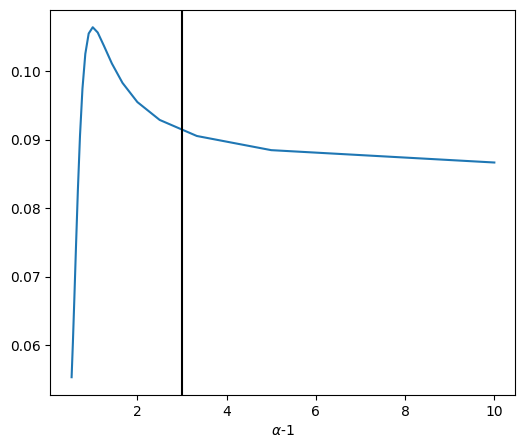

In [ ]:
print(rc_loss.shape, rc_logits.shape)
plt.plot(10./np.arange(1,20), rc_loss[1:])
plt.axvline(3, c="k")
plt.xlabel(r"$\alpha$-1")

In [ ]:
plt.plot(10/(10./np.arange(1,10)), rc_loss[1:])
plt.axvline(1, c="k")
plt.xlabel(r"$k_BT$")

In [ ]:
import torch

# seq_onehot = torch.nn.functional.one_hot(torch.from_numpy(seq).reshape(-1), num_classes=2).reshape(*seq.shape, 2)
def RC(logits):
    assert logits.shape[-1] == 2
    B = logits.shape[0]
    RC = torch.sum(logits*torch.tensor([-1,1], device=logits.device)[None,None,None,:], dim=-1)
    RC = torch.sum(RC.reshape(B, -1), dim=-1)
    return RC.reshape(-1)

In [ ]:
def plot_magn_from_logits(t, epoch=397):
    logits = np.load("logs-dir-ising/latt6x6_e/finetune1/val_baseline_latt6x6/epoch%d_sample1/logits_val_inttime%s.npy"%(epoch, t))
    norm_logits = torch.nn.functional.softmax(torch.from_numpy(logits), dim=-1)
    xt = np.load("logs-dir-ising/latt6x6_e/finetune1/val_baseline_latt6x6/epoch%d_sample1/xt_val_inttime%s.npy"%(epoch, t))
    rc = RC(torch.from_numpy(logits))
    rc_norm = RC(norm_logits)
    rc_xt = RC(torch.from_numpy(xt))
    seq = np.argmax(logits, axis=-1).reshape(-1,np.prod(seq_dim))
    seq[np.where(seq==0)]=-1
    magn = np.sum(seq, axis=-1)
    
    plt.rcParams["figure.figsize"] = (22,5)
    plt.figure()
    plt.subplot(141)
    plt.hist(rc, bins=100)
    plt.xlim((-36,36))
    plt.title("RC(logits), $k_BT$=%f"%(10./(float(t)-1+1e-5)))
    plt.subplot(142)
    plt.hist(rc_xt,bins=100)
    plt.xlim((-36,36))
    plt.title("RC(xt), $k_BT$=%f"%(10./(float(t)-1+1e-5)))
    plt.subplot(143)
    plt.hist(magn,bins=100)
    plt.xlim((-36,36))
    plt.title("RC(argmax(logits)), $k_BT$=%f"%(10./(float(t)-1+1e-5)))
    plt.subplot(144)
    plt.hist(rc_norm,bins=100)
    plt.xlim((-36,36))
    plt.title("RC(logits/|logits|)), $k_BT$=%f"%(10./(float(t)-1+1e-5)))

In [ ]:
for t in ['4.41', '4.77', '5.13', '5.49', '5.85']:
    plot_magn(t)

In [ ]:
raise RuntimeError
def kde_2d(t, rc_trajs, x_grid, bandwidth=2., stage="train"):
    """
    Kernel Density Estimation (KDE) using a Gaussian kernel.
    Parameters:
    - data: Tensor containing the data points (1-dimensional).
    - x_grid: Tensor containing the grid points for which to compute the KDE.
    - bandwidth: Bandwidth parameter for the Gaussian kernel (default=0.5).
    Returns:
    - Tensor of shape (len(x_grid),) containing the estimated density values.
    """
    # Initialize density estimates
    B = rc_trajs.shape[0]
    density = torch.zeros(*x_grid.shape[:-1], device=rc_trajs.device)
    # Compute KDE
    '''
    for ii in range(x_grid.shape[0]):
        for jj in range(x_grid.shape[1]):
            x = x_grid[ii][jj]
            # Kernel function (Gaussian kernel)
            kernel = torch.exp(-0.5 * ((rc_trajs - x[0]) / bandwidth)**2 -0.5 * ((t-x[1]) / bandwidth)**2) / 2 * torch.tensor(3.141592653589793)
            # Sum over all data points
            density[ii,jj] = torch.sum(kernel) / (bandwidth * 2 * torch.tensor(3.141592653589793))
            print(ii,jj)
    '''
    print((rc_trajs[:,None,None]-x_grid[None,:,:,0]).shape)
    print((t[:,None,None]-x_grid[None,:,:,1]).shape)
    
    kernel = torch.exp(-0.5*((rc_trajs[:,None,None]-x_grid[None,:,:,0])/bandwidth )**2 -0.5*((t[:,None,None]-x_grid[None,:,:,1])/bandwidth )**2 ) /2 *torch.pi
    density = torch.sum(kernel, dim=0)
    norm_density = density/density.sum(dim=0)[None,:]
    return norm_density

In [ ]:
x = scipy.stats.expon().rvs(size=1000)*2
plt.hist(x,bins=140,density=True)

In [ ]:
t = []
ii_list = [1.0, 1.1, 1.2, 1.4, 1.6, 1.8, 2.2, 2.8, 4.0, 4.8, 6.0]
for ii in ii_list:
    t.append(10./ii)
    print(1/ii*10, ii)
plt.plot(t, ii_list, marker="x")
plt.scatter(t, np.zeros(len(ii_list)))
plt.xlabel("Diffusion step")
plt.ylabel("$k_BT$")

In [ ]:
t_increment = np.random.uniform(size=1024)
t_increment = (t_increment-1.)*(10./6.-0.0001)
t = 10./6.+t_increment
plt.hist(t, bins=20)

In [ ]:

import torch
def RC(logits):
    assert logits.shape[-1] == 2
    B = logits.shape[0]
    RC = torch.sum(logits*torch.tensor([-1,1])[None,None,None,:], dim=-1)
    RC = torch.sum(RC.reshape(B, -1), dim=-1)
    return RC.reshape(-1,1)

def kde(rc_trajs, x_grid, bandwidth=2.):
        """
        Kernel Density Estimation (KDE) using a Gaussian kernel.

        Parameters:
        - data: Tensor containing the data points (1-dimensional).
        - x_grid: Tensor containing the grid points for which to compute the KDE.
        - bandwidth: Bandwidth parameter for the Gaussian kernel (default=0.5).

        Returns:
        - Tensor of shape (len(x_grid),) containing the estimated density values.
        """
        # Initialize density estimates
        B = rc_trajs.shape[0]
        density = torch.zeros([B, *x_grid.shape])
        # np.savetxt("rc-logits_train.dat", rc_trajs, delimiter=" ")
        # Compute KDE

        for i, x in enumerate(x_grid):
            # Kernel function (Gaussian kernel)
            kernel = torch.exp(-0.5 * ((rc_trajs.to(torch.float64) - x) / bandwidth)**2) / torch.sqrt(2 * torch.tensor(3.141592653589793))
            # Sum over all data points
            density[:,i] = torch.sum(kernel, axis=1) / (bandwidth * torch.sqrt(2 * torch.tensor(3.141592653589793)))

        sum_density = torch.sum(density, axis=1)
        norm_density = density/sum_density[:,None]
        F = -torch.log(norm_density)
        return norm_density

In [ ]:

import os, glob
import scipy
import matplotlib.pyplot as plt
seq_dim=(6,6)

# Evaluation at epoch 255

In [ ]:
# work_dir = "logs-dir-ising/latt6x6T2.0/kernel3x3_timeembed/finetune9/val_baseline_latt6x6/epoch170_sampletest"
work_dir = "logs-dir-ising/latt6x6_b/finetune25/val_baseline_latt6x6/epoch232_sample1"

In [ ]:
logits_files = sorted(glob.glob(os.path.join(work_dir, f"logits_val_step0_inttime*")))
t_span = [float(x.replace(os.path.join(work_dir, f"logits_val_step0_inttime"),"").replace(".npy","")) for x in logits_files]
print(t_span)
print([t_span[i]-t_span[i-1] for i in range(1,len(t_span))])
print(len(t_span))
num_integration_step = len(t_span)
xt = np.zeros([num_integration_step, 32768, 6, 6, 2])
logits = np.zeros([num_integration_step, 32768, 6, 6, 2])

In [ ]:
plt.plot(t_span, marker="x")

In [ ]:
import seaborn as sns
line_color = [plt.colormaps["gnuplot"](float(i)/float(num_integration_step)) for i in range(num_integration_step)]
fig, axes = plt.subplots(ncols=2, nrows=3, figsize=(12, 18))
for ii in range(num_integration_step):
    print(ii, t_span[ii])
    xt[ii] = np.load(glob.glob(os.path.join(work_dir, f"xt_val_step{0}_inttime{t_span[ii]}*"))[0])
    logits[ii] = np.load(glob.glob(os.path.join(work_dir, f"logits_val_step{0}_inttime{t_span[ii]}*"))[0])
    B = xt[ii].shape[0]

    rc=np.linspace(-36, 36, 36+1)
    rc_logits_here = kde(RC(torch.from_numpy(logits[ii])), torch.from_numpy(rc), 1.).numpy()
    rc_xt_here = kde(RC(torch.from_numpy(xt[ii])), torch.from_numpy(rc), 1.).numpy()
    rcmagn_here = np.sum(np.dot(rc_logits_here,rc).reshape(B,-1), axis=-1)
    rcmagn_xt_here = np.sum(np.dot(rc_xt_here,rc).reshape(B,-1), axis=-1)

    magn_here = np.sum(np.dot(logits[ii],np.array([-1,1])).reshape(B,-1), axis=-1)
    magn_xt_here = np.sum(np.dot(xt[ii],np.array([-1,1])).reshape(B,-1), axis=-1)

    seq_here = np.argmax(logits[ii].reshape(-1,2), axis=-1).reshape([B,-1])
    seq_here[np.where(seq_here == 0)] = -1
    magn_seq_here = np.sum(seq_here, axis=-1)
    seq_xt_here = np.argmax(xt[ii].reshape(-1,2), axis=-1).reshape([B,-1])
    seq_xt_here[np.where(seq_xt_here==0)] = -1
    magn_seq_xt_here = np.sum(seq_xt_here, axis=-1)

    # axes[0][0].hist2d(np.ones(B)*t_span[ii], magn_here, range=[[1., 8.], [-36., 36.]])
    # axes[0][1].hist2d(np.ones(B)*t_span[ii], magn_xt_here, range=[[1., 8.], [-36., 36.]])
    # # axes[0].set_ylim((-40,40))
    # axes[1][0].hist2d(np.ones(B)*t_span[ii], rcmagn_here, range=[[1., 8.], [-36., 36.]])
    # axes[1][1].hist2d(np.ones(B)*t_span[ii], rcmagn_xt_here, range=[[1., 8.], [-36., 36.]])
    sns.kdeplot(magn_here, ax=axes[0][0], color=line_color[ii])
    sns.kdeplot(magn_xt_here, ax=axes[0][1], color=line_color[ii])
    sns.kdeplot(rcmagn_here, ax=axes[1][0], color=line_color[ii])
    sns.kdeplot(rcmagn_xt_here, ax=axes[1][1], color=line_color[ii])
    sns.kdeplot(magn_seq_here, ax=axes[2][0], color=line_color[ii])
    sns.kdeplot(magn_seq_xt_here, ax=axes[2][1], color=line_color[ii])

axes[0][0].set_title("<m> from sum(model output logits)")
axes[0][0].set_xlabel("<m> of model output logits")
axes[0][1].set_title("<m> from sum(flow end)")
axes[0][1].set_xlabel("<m> of flow end")

axes[1][0].set_title("<m> from kde(RC(model output logits))")
axes[1][0].set_xlabel("<m> of model output logits")
axes[1][1].set_title("<m> from kde(RC(flow end))")
axes[1][1].set_xlabel("<m> of flow end")

axes[2][0].set_title("<m> from sum(argmax(model output logits))")
axes[2][0].set_xlabel("<m> of argmax(model output logits)")
axes[2][0].set_ylim((None, 0.1))
axes[2][1].set_title("<m> from sum(argmax(flow end))")
axes[2][1].set_xlabel("<m> of argmax(flow end)")

# At epoch 255

In [ ]:

# work_dir = "logs-dir-ising/latt6x6T2.0/kernel3x3_timeembed/finetune9/val_baseline_latt6x6/epoch170_sampletest"

In [ ]:
xt_a = np.load(os.path.join(work_dir, "xt_train_step0.npy"))
logits_a = np.load(os.path.join(work_dir, "logits_train_step0.npy"))
t_a = np.load(os.path.join(work_dir, "t_train_step0.npy"))
seq_a = np.load(os.path.join(work_dir, "seq_train_step0.npy"))

In [ ]:
plt.hist(t_a, bins=1000)

In [ ]:
B = xt_a.shape[0]
magn_a = np.sum(np.dot(xt_a,np.array([-1,1])).reshape(B,-1), axis=-1)
magn_logits_a = np.sum(np.dot(logits_a,np.array([-1,1])).reshape(B,-1), axis=-1)
magn_ref_a = np.sum(np.dot(seq_a,np.array([-1,1])).reshape(B,-1), axis=-1)
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(12, 5))
axes[0].scatter(t_a, magn_a)
axes[1].scatter(t_a, magn_logits_a, marker="x")
axes[0].scatter(t_a, magn_ref_a, marker="+", c="k", s=3)
axes[1].scatter(t_a, magn_ref_a, marker="+", c="k", s=3)
axes[0].set_title("model input \"xt\" against training data")
axes[1].set_title("model output \"logits\" against training data")

In [ ]:
rc_logits_a = np.load(os.path.join(work_dir, "rclogits_train_step0.npy"))
rc_seq_a = np.load(os.path.join(work_dir, "rcseq_train_step0.npy"))
print(rc_logits_a.shape)

In [ ]:
rc = np.linspace(-36, 36, 36+1)
rcmagn_a = np.sum(np.dot(rc_logits_a,rc).reshape(B,-1), axis=-1)
rcmagn_ref_a = np.sum(np.dot(rc_seq_a,rc).reshape(B,-1), axis=-1)

In [ ]:
plt.scatter(t_a, rcmagn_a)
plt.scatter(t_a, rcmagn_ref_a, marker="+")

# At start of the training

In [ ]:
xt = np.load("xt.npy")
t = np.load("t.npy")

In [ ]:
seq = np.load("seq.npy")
print(seq.shape)

In [ ]:
plt.hist(t)
plt.hist(t.astype(np.int64), alpha=0.5)
print(t)
print(t.astype(np.int64))

In [ ]:
B = xt.shape[0]
magn = np.sum(np.dot(xt,np.array([-1,1])).reshape(B,-1), axis=-1)
magn_ref = np.sum(np.dot(seq,np.array([-1,1])).reshape(B,-1), axis=-1)
plt.scatter(t, magn)
plt.scatter(t, magn_ref)

In [ ]:
rc_logits = np.load("rc_logits.npy")
rc_seq = np.load("rc_seq.npy")
rc = np.linspace(-36, 36, 36+1)
rcmagn = np.sum(np.dot(rc_logits,rc).reshape(B,-1), axis=-1)
rcmagn_ref = np.sum(np.dot(rc_seq,rc).reshape(B,-1), axis=-1)

In [ ]:
plt.scatter(t, rcmagn)
plt.scatter(t, rcmagn_ref, marker="+")